# Ride Sharing Analysis

### Created by: Troy Bailey
### Created on: 8/18/2018

An analysis of data from a ride sharing service. The analysis will consider correlations between number of rides, average fares and number of drivers. It will also consider differences between city types.

The raw data is read in from the CSV file and placed in a dataframe. The data is then separated by city type with various data points calculated.

A bubble chart is then created comparing the number of rides to the average fares with the size of the bubbles indicatingthe number of drivers in each city. City types are shown in different bubble colors.

Finally pie chares are created to compare total fares, total rides, and total drivers by city type.


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityData_df = pd.read_csv(city_data_to_load)
rideData_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
data_df = pd.merge(cityData_df, rideData_df, how="inner", on="city")

# Display the data table for preview
data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# Create subset dataframes by city
urbanData_df = data_df[data_df.type == "Urban"]
suburbanData_df = data_df[data_df.type == "Suburban"]
ruralData_df = data_df[data_df.type == "Rural"]

## Bubble Plot of Ride Sharing Data

In [3]:
# For each city type, create the x_axis, y_axis, and bubble size series

# URBAN CITY TYPE DATA

urbanCityList_df =urbanData_df.drop_duplicates(subset=["city"], keep = "first")
urbanCityListIndexed = urbanCityList_df.set_index("city")

# Obtain the x and y coordinates for urban city type
urbanCityGroup = urbanData_df.groupby(["city"])
urbanCityAvgFare = urbanCityGroup["fare"].mean()
urbanCityRides = urbanCityGroup["ride_id"].count()
urbanCityDrivers = urbanCityListIndexed["driver_count"]*10 #multiplying by 10 to enlarge bubbles

# SUBURBAN CITY TYPE DATA

suburbanCityList_df =suburbanData_df.drop_duplicates(subset=["city"], keep = "first")
suburbanCityListIndexed = suburbanCityList_df.set_index("city")

# Obtain the x and y coordinates for suburban city type
suburbanCityGroup = suburbanData_df.groupby(["city"])
suburbanCityAvgFare = suburbanCityGroup["fare"].mean()
suburbanCityRides = suburbanCityGroup["ride_id"].count()
suburbanCityDrivers = suburbanCityListIndexed["driver_count"]*10 #multiplying by 10 to enlarge bubbles

# RURAL CITY TYPE DATA

ruralCityList_df =ruralData_df.drop_duplicates(subset=["city"], keep = "first")
ruralCityListIndexed = ruralCityList_df.set_index("city")

# Obtain the x and y coordinates for suburban city type
ruralCityGroup = ruralData_df.groupby(["city"])
ruralCityAvgFare = ruralCityGroup["fare"].mean()
ruralCityRides = ruralCityGroup["ride_id"].count()
ruralCityDrivers = ruralCityListIndexed["driver_count"]*10 #multiplying by 10 to enlarge bubbles



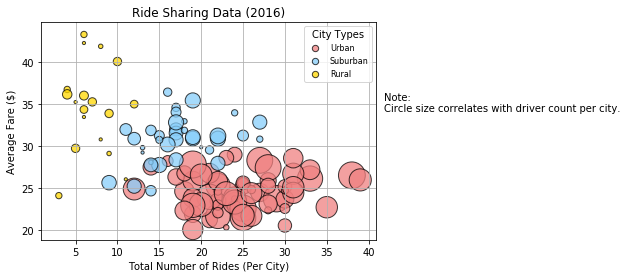

In [9]:
# Build scatter plot of number of rides versus average fare for all three city types

# Adjust figure size to correct saved fig - this is not working
# plt.figure(figsize=(7,5))

# Plot bubbles for each city type & creating handles for legend reference
plt.scatter(urbanCityRides, urbanCityAvgFare,s=urbanCityDrivers, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75, label = "Urban")
plt.scatter(suburbanCityRides, suburbanCityAvgFare,s=suburbanCityDrivers, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75, label = "Suburban")
plt.scatter(ruralCityRides, ruralCityAvgFare,s=ruralCityDrivers, marker="o", facecolors="gold", edgecolors="black", alpha=0.75, label = "Rural")

# Add titles
plt.title("Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Add grid
plt.grid()

# Create a legend for the chart
leg = plt.legend(loc="best", title = "City Types", fontsize = 8)

# Change the marker size manually for both lines
for handle in leg.legendHandles:
    handle.set_sizes([40.0])

# Set the title fontsize
leg.get_title().set_fontsize(10)

# Addan note about bubble size    
plt.figtext(0.92, 0.57,"Note:\nCircle size correlates with driver count per city.",
            horizontalalignment='left')
    
# Save an image of the chart and print to screen
plt.savefig("Images/FareVsRides.png", bbox_extra_artist = (leg,), bbox_inches ="tight")
plt.show()


## Observations of Trends in Ride Sharing Data

Not suprisingly, the chart above shows that there are generally more drivers per city in urban areas than there are in suburban and rural. However there is great variation in each group with some rural areas overlapping the number of drivers in urban areas. It would be informative to add population counts for the cities to be able to calculate drivers per capita.

Also in the chart above, there is a clear trend of higher fares in rural areas and lower fares in urban areas with suburban fares falling between the other categories. The most likely cause of this is that urban areas are more dense and ride distances are likely shorter with the reverse being true for rural areas and suburban in the middle. However the data does not indicate if fares are charged by distance. If fares are compeitive base, the availability of taxis in urban areas may drive more competition and lower fares. Addition ride distance data to the analysis would allow for more definitive analysis of the cause of the observed fare trend.

## Total Fares by City Type

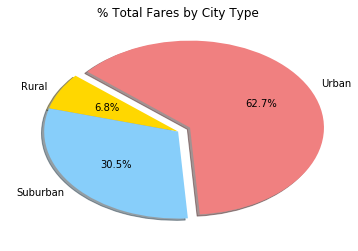

In [5]:
# Calculate type data
dataTypeGroup = data_df.groupby(["type"])
dataTypeGroupTotalFare = dataTypeGroup["fare"].sum()

# Build pie chart series
pie_types = ["Rural", "Suburban", "Urban"]
pie_colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

# Create plot
plt.pie(dataTypeGroupTotalFare, explode=explode, labels=pie_types, colors=pie_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Add title
plt.title("% Total Fares by City Type")

# Set axes which are equal so we have a perfect circle - disabled because example does not have this
# plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/farePie.png")
plt.show()

## Total Rides by City Type

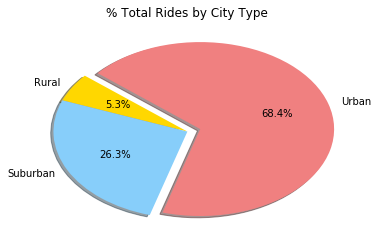

In [6]:
# Calculate type data
dataTypeGroup = data_df.groupby(["type"])
dataTypeGroupTotalRides = dataTypeGroup["ride_id"].count()

# Build pie chart series
pie_types = ["Rural", "Suburban", "Urban"]
pie_colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

# Create plot
plt.pie(dataTypeGroupTotalRides, explode=explode, labels=pie_types, colors=pie_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Add title
plt.title("% Total Rides by City Type")

# Set axes which are equal so we have a perfect circle - disabled because example does not have this
# plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/ridesPie.png")
plt.show()


## Total Drivers by City Type

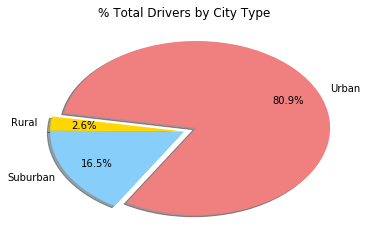

In [7]:
# Calculate type data
dedupeData_df =data_df.drop_duplicates(subset=["city"], keep = "first")
dataTypeGroup = dedupeData_df.groupby(["type"])

dataTypeGroupTotalDrivers = dataTypeGroup["driver_count"].sum()

# Build pie chart series
pie_types = ["Rural", "Suburban", "Urban"]
pie_colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

# Create plot
plt.pie(dataTypeGroupTotalDrivers, explode=explode, labels=pie_types, colors=pie_colors,
        autopct="%1.1f%%", shadow=True, startangle=170, pctdistance = 0.75)

# Add title
plt.title("% Total Drivers by City Type")

# Set axes which are equal so we have a perfect circle - disabled because example does not have this
# plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/driversPie.png")
plt.show()


## Observations of Trends in City Type Comparisons

The overall trends in comparing city type data are as would be expected: there are more drivers, rides and total fares in urban cities, fewer in suburban cities, and fewest in rural areas. However when by consider the relative percentages, it is clear that drivers in rural areas provide more rides and have more total fares than drivers in urban areas. This may be due to a lack of taxi services in rural areas creating a higher demand for ride sharing serivces.